In [16]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Load the table to be manipulated

In [5]:
tips = Table.read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


Tried doing the first problem this way first

In [17]:
male_avg_table = tips.where('sex', are.equal_to('Male'))
female_avg_table = tips.where('sex', are.equal_to('Female'))

male_tip = male_avg_table.column('tip')
male_avg = np.mean(male_tip)

female_tip = female_avg_table.column('tip')
female_avg = np.mean(female_tip)

After trying to do the brute force method, this way was a lot easier

In [19]:
avg_tips = tips.select("tip","sex").group("sex",np.mean)

C:\Users\C20Jeffrey.Gerlica\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


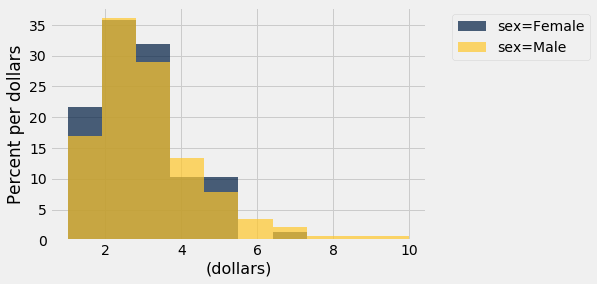

In [21]:
tips.hist('tip',unit = 'dollars', group='sex')

2)	Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7). 

In [3]:
# day = make_array('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun')
# index = np.arange(1,8,1)
# week = Table().with_columns('Day of Week', day , '# of Week', index)
# week

In [2]:
# in the textbook
def weekday_to_num(Day):
    "Returns a Number for each day of the week."
    if Day == 'Mon':
        x = 1
    elif Day == 'Tues':
        x = 2
    elif Day == 'Wed':
        x = 3
    elif Day == 'Thur':
        x = 4
    elif Day == 'Fri':
        x = 5
    elif Day == 'Sat':
        x = 6
    else:
        x = 7
    return x
weekday_to_num('Tues')

2

3) Apply this function to the day column and add the result as a new column.

Use the .apply method to apply a function to each argument of the array/column and return an array/column

In [10]:
tips_num = tips.with_column('Weekday Num',tips.apply(weekday_to_num,'day'))
tips_num

total_bill,tip,sex,smoker,day,time,size,Weekday Num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7



4) Create a function to estimate the value of a tip based on the bill. There will be a window of values close to the bill that we will average and the bill value.

In [11]:
def est_tip(bill,window):
    return np.average(tips.where('total_bill',are.between(bill-window,bill+window)).column('tip'))


5) Apply the function to the total bill column and include the result as a new column. Build a scatterplot showing the predicted and actual tip amount.

In [12]:
tips_with_est = tips.with_column('Estimated Tips',tips.apply(est_tip,'total_bill',1))
tips_with_est

total_bill,tip,sex,smoker,day,time,size,Estimated Tips
16.99,1.01,Female,No,Sun,Dinner,2,2.80618
10.34,1.66,Male,No,Sun,Dinner,3,1.90276
21.01,3.5,Male,No,Sun,Dinner,3,3.19508
23.68,3.31,Male,No,Sun,Dinner,2,3.57681
24.59,3.61,Female,No,Sun,Dinner,4,3.6575
25.29,4.71,Male,No,Sun,Dinner,4,3.67526
8.77,2,Male,No,Sun,Dinner,2,1.86857
26.88,3.12,Male,No,Sun,Dinner,4,3.72424
15.04,1.96,Male,No,Sun,Dinner,2,2.54036
14.78,3.23,Male,No,Sun,Dinner,2,2.46231


Scatter plot what I just did with the estimated tips

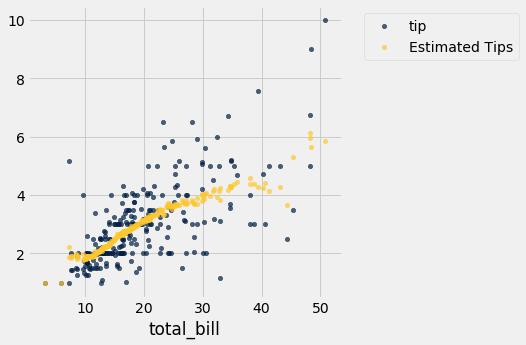

In [15]:
tips_plot = tips_with_est.select('total_bill','tip','Estimated Tips')
tips_plot.scatter('total_bill')